# Data Wrangling Project 
***for #WeRateDogs tweets***

## Gather

Download manually through link: <a href='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv'>twitter_archive_enhanced.csv</a>
    
Download programmatically: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv (image_predictions.tsv)

Consult <a href='http://www.tweepy.org/'>Tweepy</a> to download all needed information and store in: `tweet_json.txt`

### Imports

In [13]:
import requests
import os
import tweepy
import json
import pandas as pd
import numpy as np
import time
import re
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Manually downloaded

In [14]:
df_tweet = pd.read_csv('twitter-archive-enhanced.csv')

In [15]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Programmatically downloading

In [16]:
# Cria o diretório, caso este não exista
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [17]:
image_predictions_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [18]:
# Pega a *image_predictions_url*
response = requests.get(image_predictions_url)
# Escreve o arquivo com o mesmo nome e extensão da última parte (depois da última '/') da *image_predictions_url*
with open (os.path.join(folder_name, image_predictions_url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [19]:
df_img_predic = pd.read_csv('image_predictions/image-predictions.tsv', delim_whitespace=True)

In [20]:
df_img_predic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Downloading through *tweepy*

In [21]:
# Dados padrões para consumir o serviço da API do Twitter
consumer_key = "j831PoGziM2mwrDR8B1pbr0qv"
consumer_secret = "4fhZ0iFlKKGS9frDM0ItTdMlU6RrtQymcdsNSqOHfW4oPxinyW"
oauth_token = "3234698503-769qKEWP4SfdUv2KeagCFwFz2xvBUbpkl4YuEGd"
oauth_token_secret = "tHLw6xNwn0xWbsrg1015ldiispvxatB06T6ahW6v6YneL"

In [22]:
# Função que recebe um *tweet_id* e *tweepy*, pega o *status* e retorna a *retweet_count* e *favorite_count*
def get_tweepy_info(tweet_id, api):
    tweet = api.get_status(tweet_id)
    return [tweet.retweet_count, tweet.favorite_count]

In [23]:
# Cria um autenticador
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(oauth_token, oauth_token_secret)
# Cria a API de conexão
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [24]:
# Pega uma lista de *tweet_id*
tweet_id_list = list(df_tweet.tweet_id)

In [25]:
# Conta o tempo para ver quanto demorará para finalizar este procedimento
start = time.time()

dict_list = []
tweets_not_found_list = []
# Para cada *tweet_id* em *tweet_id_list*
for tweet_id in tweet_id_list:
    # Tenta pegar as informações do *tweet* (*retweet_count* e *favorite_count*)
    try:
        print(tweet_id)
        tweet = get_tweepy_info(tweet_id, api)
        # Acrescenta em uma lista de dicionário
        dict_list.append({'tweet_id': tweet_id,
                          'retweet_count': tweet[0],
                          'favorite_count': tweet[1]})
    # Caso alguma exceção é encontrada
    except Exception as e:
        # Imprime o *tweet_id* que não foi encontrado e acrescenta-o em na lista *tweets_not_found_list*
        print(tweet_id, "Wasn't found!")
        tweets_not_found_list.append(tweet_id)
        
# Imprime o tempo gasto neste procedimento
end = time.time()
print(end - start)

892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760
888917238123831296
888804989199671297
888554962724278272
888202515573088257
888202515573088257 Wasn't found!
888078434458587136
887705289381826560
887517139158093824
887473957103951883
887343217045368832
887101392804085760
886983233522544640
886736880519319552
886680336477933568
886366144734445568
886267009285017600
886258384151887873
886054160059072513
885984800019947520
885528943205470208
885518971528720385
885311592912609280
885167619883638784
884925521741709313
884876753390489601
884562892145688576
884441805382717440
884247878851493888
884162670584377345
883838122936631299
883482846933004288
883360690899218434
883117836046086144
882992080364220416
882762694511734784
88262727032160256

822610361945911296
822489057087389700
822462944365645825
822244816520155136
822163064745328640
821886076407029760
821813639212650496
821765923262631936
821522889702862852
821421320206483457
821407182352777218
821153421864615936
821149554670182400
821107785811234820
821044531881721856
820837357901512704
820749716845686786
820690176645140481
820494788566847489
820446719150292993
820314633777061888
820078625395449857
820013781606658049
819952236453363712
819924195358416896
819711362133872643
819588359383371776
819347104292290561
819238181065359361
819227688460238848
819015337530290176
819015331746349057
819006400881917954
819004803107983360
818646164899774465
818627210458333184
818614493328580609
818588835076603904
818536468981415936
818307523543449600
818259473185828864
818145370475810820
817908911860748288
817827839487737858
817777686764523521
817536400337801217
817502432452313088
817423860136083457
817415592588222464
817181837579653120
817171292965273600
817120970343411712
817056546584

766864461642756096
766793450729734144
766714921925144576
766693177336135680
766423258543644672
766313316352462849
766078092750233600
766069199026450432
766008592277377025
765719909049503744
765669560888528897
765395769549590528
765371061932261376
765222098633691136
764857477905154048
764259802650378240
763956972077010945
763837565564780549
763183847194451968
763167063695355904
763103485927849985
762699858130116608
762471784394268675
762464539388485633
762316489655476224
762035686371364864
761976711479193600
761750502866649088
761745352076779520
761672994376806400
761599872357261312
761371037149827077
761334018830917632
761292947749015552
761227390836215808
761004547850530816
760893934457552897
760656994973933572
760641137271070720
760539183865880579
760521673607086080
760290219849637889
760252756032651264
760190180481531904
760153949710192640
759943073749200896
759923798737051648
759846353224826880
759793422261743616
759566828574212096
759557299618865152
759447681597108224
759446261539

Rate limit reached. Sleeping for: 474


758740312047005698 Wasn't found!
758474966123810816
758467244762497024
758405701903519748
758355060040593408
758099635764359168
758041019896193024
757741869644341248
757729163776290825
757725642876129280
757611664640446465
757597904299253760
757596066325864448
757400162377592832
757393109802180609
757354760399941633
756998049151549440
756939218950160384
756651752796094464
756526248105566208
756303284449767430
756288534030475264
756275833623502848
755955933503782912
755206590534418437
755110668769038337
754874841593970688
754856583969079297
754747087846248448
754482103782404096
754449512966619136
754120377874386944
754011816964026368
754011816964026368 Wasn't found!
753655901052166144
753420520834629632
753398408988139520
753375668877008896
753298634498793472
753294487569522689
753039830821511168
753026973505581056
752932432744185856
752917284578922496
752701944171524096
752682090207055872
752660715232722944
752568224206688256
752519690950500352
752334515931054080
752309394570878976
752

705898680587526145
705786532653883392
705591895322394625
705475953783398401
705442520700944385
705428427625635840
705239209544720384
705223444686888960
705102439679201280
705066031337840642
704871453724954624
704859558691414016
704847917308362754
704819833553219584
704761120771465216
704499785726889984
704491224099647488
704480331685040129
704364645503647744
704347321748819968
704134088924532736
704113298707505153
704054845121142784
703774238772166656
703769065844768768
703631701117943808
703611486317502464
703425003149250560
703407252292673536
703382836347330562
703356393781329922
703268521220972544
703079050210877440
703041949650034688
702932127499816960
702899151802126337
702684942141153280
702671118226825216
702598099714314240
702539513671897089
702332542343577600
702321140488925184
702276748847800320
702217446468493312
701981390485725185
701952816642965504
701889187134500865
701805642395348998
701601587219795968
701570477911896070
701545186879471618
701214700881756160
700890391244

678675843183484930
678643457146150913
678446151570427904
678424312106393600
678410210315247616
678399652199309312
678396796259975168
678389028614488064
678380236862578688
678341075375947776
678334497360859136
678278586130948096
678255464182861824
678023323247357953
678021115718029313
677961670166224897
677918531514703872
677895101218201600
677716515794329600
677700003327029250
677698403548192770
677687604918272002
677673981332312066
677662372920729601
677644091929329666
677573743309385728
677565715327688705
677557565589463040
677547928504967168
677530072887205888
677335745548390400
677334615166730240
677331501395156992
677328882937298944
677314812125323265
677301033169788928
677269281705472000
677228873407442944
677187300187611136
676975532580409345
676957860086095872


Rate limit reached. Sleeping for: 449


676957860086095872 Wasn't found!
676949632774234114
676948236477857792
676946864479084545
676942428000112642
676936541936185344
676916996760600576
676897532954456065
676864501615042560
676821958043033607
676819651066732545
676811746707918848
676776431406465024
676617503762681856
676613908052996102
676606785097199616
676603393314578432
676593408224403456
676590572941893632
676588346097852417
676582956622721024
676575501977128964
676533798876651520
676496375194980353
676470639084101634
676440007570247681
676430933382295552
676263575653122048
676237365392908289
676219687039057920
676215927814406144
676191832485810177
676146341966438401
676121918416756736
676101918813499392
676098748976615425
676089483918516224
675898130735476737
675891555769696257
675888385639251968
675878199931371520
675870721063669760
675853064436391936
675849018447167488
675845657354215424
675822767435051008
675820929667219457
675798442703122432
675781562965868544
675740360753160193
675710890956750848
67570733020654796

668221241640230912
668204964695683073
668190681446379520
668171859951755264
668154635664932864
668142349051129856
668113020489474048
667937095915278337
667924896115245057
667915453470232577
667911425562669056
667902449697558528
667886921285246976
667885044254572545
667878741721415682
667873844930215936
667866724293877760
667861340749471744
667832474953625600
667806454573760512
667801013445750784
667793409583771648
667782464991965184
667773195014021121
667766675769573376
667728196545200128
667724302356258817
667550904950915073
667550882905632768
667549055577362432
667546741521195010
667544320556335104
667538891197542400
667534815156183040
667530908589760512
667524857454854144
667517642048163840
667509364010450944
667502640335572993
667495797102141441
667491009379606528
667470559035432960
667455448082227200
667453023279554560
667443425659232256
667437278097252352
667435689202614272
667405339315146752
667393430834667520
667369227918143488
667211855547486208
667200525029539841
667192066997

In [26]:
# Salva o JSON retornado pelo procedimento anterior
with open('tweet_json.txt', 'w') as file:
    json.dump(dict_list, file, ensure_ascii=False)

In [27]:
# Cria um *dataframe* através da lista de dicionários
df = pd.DataFrame(dict_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [28]:
# Salva o *dataframe* em um arquivo CSV
df.to_csv('favorites_retweets_count.csv', index=False)

In [29]:
# Lê o arquivo *favorites_retweets_count* e o atribui a um *dataframe*
df_fav_retweets = pd.read_csv('favorites_retweets_count.csv')

In [30]:
df_fav_retweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
tweet_id          2340 non-null int64
retweet_count     2340 non-null int64
favorite_count    2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


## Analysis

### Analyzing *df_tweet dataframe*

In [34]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [35]:
# Inspecionando toda a informação que não está sendo completamente mostrada
pd.set_option('display.max_colwidth', -1)
df_tweet

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [36]:
# Checando por dados duplicados
df_tweet[df_tweet.duplicated() == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [37]:
# Checando todos os valores em *source column*
df_tweet['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [38]:
# Checando todos os valores em *name column*
df_tweet['name'].value_counts()

None          745
a             55 
Charlie       12 
Lucy          11 
Cooper        11 
Oliver        11 
Tucker        10 
Penny         10 
Lola          10 
Bo            9  
Winston       9  
Sadie         8  
the           8  
Toby          7  
Buddy         7  
Bailey        7  
an            7  
Daisy         7  
Rusty         6  
Jax           6  
Leo           6  
Stanley       6  
Jack          6  
Koda          6  
Dave          6  
Bella         6  
Scout         6  
Oscar         6  
Milo          6  
Sammy         5  
             ..  
Florence      1  
Ike           1  
Randall       1  
Tedders       1  
Bradlay       1  
officially    1  
Jersey        1  
Tommy         1  
Sandra        1  
Brandy        1  
Rueben        1  
Cannon        1  
Tebow         1  
Philippe      1  
Dale          1  
Ben           1  
Jomathan      1  
Strudel       1  
Skittles      1  
Bertson       1  
Rambo         1  
Pepper        1  
Bode          1  
Kial          1  
Ronnie    

In [39]:
# Checando todos os valores em *doggo column*
df_tweet['doggo'].value_counts()

None     2259
doggo    97  
Name: doggo, dtype: int64

In [40]:
# Checando todos os valores em *floofer column*
df_tweet['floofer'].value_counts()

None       2346
floofer    10  
Name: floofer, dtype: int64

In [41]:
# Checando todos os valores em *pupper column*
df_tweet['pupper'].value_counts()

None      2099
pupper    257 
Name: pupper, dtype: int64

In [42]:
# Checando todos os valores em *puppo column*
df_tweet['puppo'].value_counts()

None     2326
puppo    30  
Name: puppo, dtype: int64

In [43]:
# Checando todos os valores em *rating_numerator column*
df_tweet.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

**Problema encontrado durante a Visualização**

*Tweets* para corrigir o numerador:  
_666287406224695296, 667878741721415682, 722974582966214656, 883482846933004288, 778027034220126208,_  
_674646392044941312, 680494726643068929, 716439118184652801, 786709082849828864_

*Tweet* que não tem classificação:  
_810984652412424192_

In [44]:
# Coloco todas as colunas para mostrar todo o texto dentro de seus campos
pd.set_option('display.max_colwidth', -1)
# Checo alguns valores, para ter certeza que a classificação está correto.
# Caso encontro algum errado, acrescento o *tweet_id* na lista acima.
df_tweet.query('rating_numerator == 27')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None


In [45]:
# Checando todos os valores em *rating_denominator column*
df_tweet.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

**Problema encontrado durante a Visualização**

*Tweets* para corrigir o denominador:  
_716439118184652801, 740373189193256964, 682962037429899265, 722974582966214656, 666287406224695296_

*Tweet* que não tem classificação:  
_810984652412424192_

In [46]:
# Coloco todas as colunas para mostrar todo o texto dentro de seus campos
# Coloco
pd.set_option('display.max_colwidth', -1)
# Checo alguns valores, para ter certeza que a classificação está correto.
# Caso encontro algum errado, acrescento o *tweet_id* na lista acima.
df_tweet.query('rating_denominator == 2')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,an,None,None,None,None


### Analyzing *df_img_predic dataframe*

In [47]:
df_img_predic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [48]:
# Imprimindo todo o *dataframe*
df_img_predic

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [49]:
# Inspecionando os seguintes *tweet_ids*:
# 736010884653420544, 671488513339211776, 666396247373291520
df_img_predic.query('tweet_id == 666396247373291520')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
27,666396247373291520,https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg,1,Chihuahua,0.978108,True,toy_terrier,0.009397,True,papillon,0.004577,True


In [50]:
# Checando por dados duplicados
df_img_predic[df_img_predic.duplicated() == True]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [51]:
# Checando por nulos em *tweet_id column*
df_img_predic[df_img_predic['tweet_id'].isnull() == True]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [52]:
# Checando por nulos em *jpg_url column*
df_img_predic[df_img_predic['jpg_url'].isnull() == True]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [53]:
# Checando por nulos em *p1 column*
df_img_predic[df_img_predic['p1'].isnull() == True]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [54]:
# Checando por nulos em *p1_conf column*
df_img_predic[df_img_predic['p1_conf'].isnull() == True]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [55]:
# Checando por nulos em *p1_dog column*
df_img_predic[df_img_predic['p1_dog'].isnull() == True]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Analyzing *df_fav_retweets dataframe*

In [56]:
df_fav_retweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
tweet_id          2340 non-null int64
retweet_count     2340 non-null int64
favorite_count    2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [57]:
# Checando 10 amostras aleatórias
df_fav_retweets.sample(10)

,tweet_id,retweet_count,favorite_count
973,748977405889503236,3722,11449
729,780601303617732608,3698,13056
2339,666020888022790149,512,2558
671,788765914992902144,11498,29744
1339,703631701117943808,750,2757
1318,705442520700944385,1792,4722
1496,691416866452082688,8292,20554
561,801538201127157760,2301,8879
20,887705289381826560,5366,29953
1939,673636718965334016,389,1154


In [58]:
# Checando por dados duplicados
df_fav_retweets[df_fav_retweets.duplicated() == True]

,tweet_id,retweet_count,favorite_count


In [59]:
# Checando por nulos em *tweet_id column*
df_fav_retweets[df_fav_retweets['tweet_id'].isnull() == True]

,tweet_id,retweet_count,favorite_count


In [60]:
# Checando por nulos em *retweet_count column*
df_fav_retweets[df_fav_retweets['retweet_count'].isnull() == True]

,tweet_id,retweet_count,favorite_count


In [61]:
# Checando por nulos em *favorite_count column*
df_fav_retweets[df_fav_retweets['favorite_count'].isnull() == True]

,tweet_id,retweet_count,favorite_count


In [62]:
# Checando por colunas repetidas nos três *dataframes*
all_columns = pd.Series(list(df_tweet) + list(df_img_predic) + list(df_fav_retweets))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

## Assess

### Quality problems:

1. Fuso horário "+0000" na coluna *timestamp*.
2. Tipos de dados errados (*timestamp, dog phase classification*).
3. Dados de fase do cachorro (*doggo, floofer, pupper, puppo*) preenchidos com *string* 'None', ao invés de *null*.
4. Cães com o campo *name* preenchido com *string* 'None', 'a', 'an', 'the', etc.
5. Coluna *source* preenchida com informação desnecessária (*tags* de HTML).
6. Colunas com muitos valores nulos (*in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp*).
7. Colunas com nomes não intuitivos (*timestamp* | *p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog*).
8. URLs repetidas na coluna *expanded_urls*.
9. *Retweets* (identificados por um 'RT' na coluna *text*).
10. Predições de imagens sem cães (contendo outros animais ou objetos).
11. *Tweets* sem imagens.
12. *Tweets* com valores de *rating_numerator* e *rating_denominator* inválidos (_666287406224695296, 667878741721415682, 722974582966214656, 883482846933004288, 674646392044941312, 680494726643068929, 716439118184652801, 786709082849828864, 778027034220126208 740373189193256964, 682962037429899265_).
13. *Tweet* que não contém classificação (_810984652412424192_).
14. Classificação acima ou abaixo da variação padrão (Numerador: 7 ~ 14; Denominador: 10), dificultando definir médias.

### Tidiness problems:

1. Uma variável em quatro colunas na tabela `tweet` (*doggo, floofer, pupper and puppo*).
2. Quantidade de favoritos e *retweets* são parte de um `tweet`.

## Clean

In [63]:
tweet_clean = df_tweet.copy()
img_predic_clean = df_img_predic.copy()
fav_retweets_clean = df_fav_retweets.copy()

### Missing Data

Sem dados faltantes para tratar.

### Tidiness

**Uma variável em quatro colunas na tabela `tweet` (*doggo, floofer, pupper and puppo*).**

#### Define

Criar uma nova coluna *dog_phase* contendo a fase do cão (doggo, floofer, pupper or puppo).
"Soltar" as colunas originais.

#### Code

In [64]:
# Transformando a fase do cão em *boolean*, para ficar mais fácil de lidar com estas colunas a seguir
tweet_clean.doggo.replace('doggo', True, inplace=True)
tweet_clean.floofer.replace('floofer', True, inplace=True)
tweet_clean.pupper.replace('pupper', True, inplace=True)
tweet_clean.puppo.replace('puppo', True, inplace=True)

In [65]:
# Função retorna uma *dog_phase*, de acordo com cada umas das quatro colunas analisadas
def dog_phase_column(df):
    # Encontra a fase do cão em uma coluna recebida e retorna sua descrição. Retorna nulo caso não encontre descrição.
    # (dog_phases being either doggo, floofer, pupper or puppo)
    if df['doggo'] is True:
        return 'doggo'
    elif df['floofer'] is True:
        return 'floofer'
    elif df['pupper'] is True:
        return 'pupper'
    elif df['puppo'] is True:
        return 'puppo'
    else:
        return np.nan

In [66]:
# Cria uma coluna *dog_phase*
tweet_clean['dog_phase'] = pd.Series()
# Aplica a função `dog_phase_column` nesta nova coluna
tweet_clean['dog_phase'] = tweet_clean.apply(dog_phase_column, axis=1)

In [67]:
# Cria uma lista de colunas para "soltar"
dog_phase_columns = ['doggo', 'floofer', 'pupper', 'puppo']

In [68]:
# Solta as antigas colunas de fase do cão
tweet_clean.drop(labels=dog_phase_columns, axis=1, inplace=True)

#### Test

In [69]:
tweet_clean.dog_phase.value_counts()

pupper     245
doggo      97 
puppo      29 
floofer    9  
Name: dog_phase, dtype: int64

**Quantidade de favoritos e *retweets* são parte de um `tweet`.**

#### Define

Juntar a tabela `fav_retweets_clean` na tabela `tweet_clean`.

#### Code

In [70]:
# Definindo a junção por *given_name* e *surname*
join_condition_name = ['tweet_id']
# Juntando as tabelas baseado na *join_condition_name*
tweet_clean = pd.merge(tweet_clean, fav_retweets_clean, on=join_condition_name, how='left')

#### Test

In [71]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_phase                     380 non-null object
retweet_count                 2340 non-null float64
favorite_count                2340 non-null float64
dtypes: float64(6), int64(3), object(7)
memory usage: 312.9+ KB


In [72]:
tweet_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_phase,retweet_count,favorite_count
657,791774931465953280,NaN,NaN,2016-10-27 22:53:48 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Vine will be deeply missed. This was by far my favorite one. 14/10 https://t.co/roqIxCvEB3,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,14,10,None,NaN,24798.0,48935.0
1170,720775346191278080,NaN,NaN,2016-04-15 00:46:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Berkeley. He's in a predicament. 10/10 someone help him https://t.co/XSEXdQupej,NaN,NaN,NaN,https://twitter.com/dog_rates/status/720775346191278080/photo/1,10,10,Berkeley,NaN,737.0,2622.0
611,797165961484890113,7.971238e+17,29166305.0,2016-11-11 19:55:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@JODYHiGHROLLER it may be an 11/10 but what do I know 😉,NaN,NaN,NaN,NaN,11,10,None,NaN,31.0,250.0
552,804413760345620481,NaN,NaN,2016-12-01 19:56:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Rusty. He's going D1 for sure. Insane vertical. 13/10 would draft https://t.co/AsykOwMrXQ,7.848260e+17,4.196984e+09,2016-10-08 18:41:19 +0000,"https://twitter.com/dog_rates/status/784826020293709826/photo/1,https://twitter.com/dog_rates/status/784826020293709826/photo/1",13,10,Rusty,NaN,3588.0,0.0
2306,666835007768551424,NaN,NaN,2015-11-18 04:27:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",These are Peruvian Feldspars. Their names are Cupit and Prencer. Both resemble Rand Paul. Sick outfits 10/10 &amp; 10/10 https://t.co/ZnEMHBsAs1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666835007768551424/photo/1,10,10,None,NaN,80.0,218.0


### Quality 

**Fuso horário "+0000" na coluna *timestamp*.**

#### Define

Remover o fuso horário da coluna *timestamp*.

#### Code

In [73]:
# Regex para obter o fuso horário +0000
timezone_regex = r'(\+0{4})'

In [74]:
# Remove o fuso horário da coluna *timestamp*
tweet_clean['timestamp'] = tweet_clean['timestamp'].str.replace(timezone_regex, '')

#### Test

In [75]:
tweet_clean.timestamp.sample(5)

816     2016-08-31 00:58:39 
1610    2016-01-08 18:43:29 
1787    2015-12-17 19:07:09 
1218    2016-03-29 23:29:14 
686     2016-10-17 17:32:13 
Name: timestamp, dtype: object

**Tipos de dados errados (*timestamp, dog phase classification*).**

#### Define

Transformar *timestamp* em `datetime` e *dog_phase* em `category`.

#### Code

In [76]:
# Mudando *timestamp* para `datetime`
tweet_clean.timestamp = pd.to_datetime(tweet_clean.timestamp)

In [77]:
# Mudando *dog_phase* para `category`
tweet_clean.dog_phase = tweet_clean.dog_phase.astype("category")

#### Test

In [78]:
tweet_clean.timestamp.sample(5)

288    2017-03-05 19:48:43
1304   2016-03-09 03:45:22
78     2017-06-21 19:36:23
1791   2015-12-17 03:53:20
707    2016-10-10 16:20:36
Name: timestamp, dtype: datetime64[ns]

In [79]:
tweet_clean[tweet_clean.dog_phase.notnull()].dog_phase.sample(5)

1458    pupper
748     pupper
1051    doggo 
281     pupper
1063    doggo 
Name: dog_phase, dtype: category
Categories (4, object): [doggo, floofer, pupper, puppo]

**Dados de fase do cachorro (*doggo, floofer, pupper, puppo*) preenchidos com *string* 'None', ao invés de *null*. (RESOLVIDO ANTERIORMENTE)**

**Cães com o campo *name* preenchido com *string* 'None', 'a', 'an', 'the', etc.**

#### Define

Transformar valores como 'None', 'a', 'an' and 'the' em *Null*.

#### Code

In [80]:
# Substituir 'None', 'a', 'an' and 'the' por *Null*
tweet_clean.name.replace('None', np.nan, inplace=True)
tweet_clean.name.replace('a', np.nan, inplace=True)
tweet_clean.name.replace('an', np.nan, inplace=True)
tweet_clean.name.replace('the', np.nan, inplace=True)

#### Test

In [81]:
tweet_clean.name.value_counts()

Charlie     12
Cooper      11
Oliver      11
Lucy        11
Tucker      10
Lola        10
Penny       10
Bo          9 
Winston     9 
Sadie       8 
Toby        7 
Bailey      7 
Daisy       7 
Buddy       7 
Scout       6 
Rusty       6 
Koda        6 
Milo        6 
Oscar       6 
Stanley     6 
Jax         6 
Leo         6 
Jack        6 
Dave        6 
Bella       6 
Sammy       5 
George      5 
Oakley      5 
Bentley     5 
Larry       5 
           .. 
Tayzie      1 
Florence    1 
Ike         1 
Randall     1 
Tedders     1 
Jersey      1 
Tommy       1 
Bertson     1 
Strudel     1 
Staniel     1 
Brandy      1 
Rueben      1 
Cannon      1 
Tebow       1 
Philippe    1 
Dale        1 
Ben         1 
Jomathan    1 
Sandra      1 
Shooter     1 
Skittles    1 
Rambo       1 
Pepper      1 
Bode        1 
Kial        1 
Ronnie      1 
Maks        1 
Ace         1 
Snoop       1 
Dido        1 
Name: name, Length: 953, dtype: int64

**Coluna *source* preenchida com informação desnecessária (*tags* de HTML).**

#### Define

Remover *tags* HTML da coluna *source*.

#### Code

In [82]:
# Regex que obtém qualquer informação dentro de uma *tag* HTML <a>
source_regex = r'>(.*)<\/a>'

In [83]:
# Aplicando a regex anterior
tweet_clean['source'] = tweet_clean['source'].str.extract(source_regex, expand=False)

#### Test

In [85]:
tweet_clean.source.sample(10)

1636    Twitter for iPhone 
2007    Twitter for iPhone 
2278    Twitter for iPhone 
2246    Twitter for iPhone 
56      Twitter for iPhone 
1760    Vine - Make a Scene
101     Twitter for iPhone 
1822    Twitter for iPhone 
1258    Twitter for iPhone 
204     Twitter for iPhone 
Name: source, dtype: object

**Colunas com muitos valores nulos (*in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp*).**

#### Define

Soltar essas colunas.

#### Code

In [86]:
# Colunas para soltar
columns_to_drop = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 
                   'retweeted_status_timestamp']

In [87]:
# Soltando as colunas
tweet_clean.drop(labels=columns_to_drop, axis=1, inplace=True)

#### Test

In [88]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  1541 non-null object
dog_phase             380 non-null category
retweet_count         2340 non-null float64
favorite_count        2340 non-null float64
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 205.0+ KB


**Colunas com nomes não intuitivos (*timestamp* | *p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog*).**

#### Define

Renomear estas colunas para nomes mais intuitivos.

#### Code

In [89]:
# Renomeando colunas
tweet_clean.rename(columns={'timestamp': 'date'}, inplace=True)
img_predic_clean.rename(columns={'p1': 'prediction_1', 'p1_conf': 'prediction_1_conf', 'p1_dog': 'prediction_1_is_dog', 
                                 'p2': 'prediction_2', 'p2_conf': 'prediction_2_conf', 'p2_dog': 'prediction_2_is_dog', 
                                 'p3': 'prediction_3', 'p3_conf': 'prediction_3_conf', 'p3_dog': 'prediction_3_is_dog'},
                        inplace=True)

#### Test

In [90]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2356 non-null int64
date                  2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  1541 non-null object
dog_phase             380 non-null category
retweet_count         2340 non-null float64
favorite_count        2340 non-null float64
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 205.0+ KB


In [91]:
img_predic_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id               2075 non-null int64
jpg_url                2075 non-null object
img_num                2075 non-null int64
prediction_1           2075 non-null object
prediction_1_conf      2075 non-null float64
prediction_1_is_dog    2075 non-null bool
prediction_2           2075 non-null object
prediction_2_conf      2075 non-null float64
prediction_2_is_dog    2075 non-null bool
prediction_3           2075 non-null object
prediction_3_conf      2075 non-null float64
prediction_3_is_dog    2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


**URLs repetidas na coluna *expanded_urls*.**

#### Define

Remover as URLs repetidas.

#### Code

In [92]:
# Função que retorna apenas uma URL de uma lista de URLs recebida
def get_one_expanded_url(expanded_urls):
    # Separa para criar uma lista
    url_list = list(expanded_urls.split(','))
    for a_url in url_list:
        # Retorna a URL apenas se encontrar a palavra 'twitter'
        if re.search('twitter', a_url):
            return a_url
    
    return

In [93]:
# Mapeia a função `get_one_expanded_url` na coluna *expanded_urls*
tweet_clean.expanded_urls = tweet_clean.expanded_urls.map(get_one_expanded_url, na_action='ignore')

#### Test

In [94]:
tweet_clean.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/806629075125202948/photo/1          2
https://twitter.com/dog_rates/status/679828447187857408/photo/1          2
https://twitter.com/dog_rates/status/750719632563142656/photo/1          2
https://twitter.com/dog_rates/status/820314633777061888/photo/1          2
https://twitter.com/dog_rates/status/842163532590374912/photo/1          2
https://twitter.com/dog_rates/status/781524693396357120/photo/1          2
https://twitter.com/dog_rates/status/739979191639244800/photo/1          2
https://twitter.com/dog_rates/status/675354435921575936/video/1          2
https://twitter.com/dog_rates/status/674291837063053312/photo/1          2
https://twitter.com/dog_rates/status/667182792070062081/photo/1          2
https://twitter.com/dog_rates/status/786233965241827333/photo/1          2
https://twitter.com/dog_rates/status/725842289046749185/photo/1          2
https://twitter.com/dog_rates/status/780601303617732608/photo/1          2
https://twitter.com/dog_r

***Retweets* (identificados por um 'RT' na coluna *text*).**

#### Define

Soltar as linhas de *retweet*.

#### Code

In [95]:
# Preserva apenas linhas que não tiverem 'RT' no início de suas frases
tweet_clean = tweet_clean[~tweet_clean.text.str.contains('^RT')]

#### Test

In [96]:
tweet_clean[tweet_clean.text.str.contains('^RT')]

,tweet_id,date,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_phase,retweet_count,favorite_count


**Predições de imagens sem cães (contendo outros animais ou objetos).**

#### Define

Manter apenas predições de cães.  
Soltar predições nulas.  
Soltar também as predições antigas (1, 2 e 3).

#### Code

In [97]:
# Função que recebe um *dataframe*, checa se qualquer predição corresponde a um cão. Caso verdadeiro, retorna esta predição.
# Caso falso, retorna *Null*
def dog_prediction_only(df):
    if df.prediction_1_is_dog:
        return pd.Series([df.prediction_1, df.prediction_1_conf])
    elif df.prediction_2_is_dog:
        return pd.Series([df.prediction_2, df.prediction_2_conf])
    elif df.prediction_3_is_dog:
        return pd.Series([df.prediction_3, df.prediction_3_conf])
    else:
        return pd.Series([np.nan, np.nan])

In [98]:
# Aplicando a a função `dog_prediction_only` nas novas colunas *prediction* e *prediction_conf*
img_predic_clean[['prediction','prediction_conf']]  = img_predic_clean.apply(dog_prediction_only, axis=1)

In [99]:
# Solta todas as linhas que contiverem qualquer valor nulo na coluna *prediction*
img_predic_clean.dropna(subset=['prediction'], inplace=True)

In [100]:
# Solta as colunas de predições antigas
old_predict_columns = ['prediction_1', 'prediction_1_conf', 'prediction_1_is_dog', 'prediction_2', 'prediction_2_conf', 
                       'prediction_2_is_dog', 'prediction_3', 'prediction_3_conf', 'prediction_3_is_dog']
img_predic_clean.drop(columns=old_predict_columns, inplace=True)

#### Test

In [101]:
img_predic_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 5 columns):
tweet_id           1751 non-null int64
jpg_url            1751 non-null object
img_num            1751 non-null int64
prediction         1751 non-null object
prediction_conf    1751 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 82.1+ KB


In [102]:
img_predic_clean.head(10)

,tweet_id,jpg_url,img_num,prediction,prediction_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,golden_retriever,0.007959
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930


***Tweets* sem imagens.**

#### Define

Preservar apenas *tweets* com imagens do *dataframe* `img_predic_clean`, através da junção de ambos *dataframes*.  
Soltar as linhas onde a *jpg_url* é nula.

#### Code

In [103]:
# Juntar ambas tabelas baseadas na coluna *tweet_id*
tweet_img_clean = pd.merge(tweet_clean, img_predic_clean, on='tweet_id', how='left')

In [104]:
# Manter apenas *tweets* que tiverem *jpg_url*
tweet_img_clean = tweet_img_clean[tweet_img_clean.jpg_url.notnull()]

#### Test

In [105]:
tweet_img_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1685 entries, 1 to 2172
Data columns (total 15 columns):
tweet_id              1685 non-null int64
date                  1685 non-null datetime64[ns]
source                1685 non-null object
text                  1685 non-null object
expanded_urls         1685 non-null object
rating_numerator      1685 non-null int64
rating_denominator    1685 non-null int64
name                  1210 non-null object
dog_phase             260 non-null category
retweet_count         1682 non-null float64
favorite_count        1682 non-null float64
jpg_url               1685 non-null object
img_num               1685 non-null float64
prediction            1685 non-null object
prediction_conf       1685 non-null float64
dtypes: category(1), datetime64[ns](1), float64(4), int64(3), object(6)
memory usage: 199.3+ KB


***Tweets* com valores de *rating_numerator* e *rating_denominator* inválidos**  
(_666287406224695296, 667878741721415682, 722974582966214656, 883482846933004288, 674646392044941312, 680494726643068929, 716439118184652801, 786709082849828864, 778027034220126208, 740373189193256964, 682962037429899265_)

#### Define

Mudar para a classificação correta, usando `loc`.

#### Code

In [106]:
# Usando `loc` para pegar o respectivo campo e mudar seu valor
tweet_img_clean.loc[tweet_img_clean.tweet_id == 666287406224695296, 'rating_numerator'] = 9
tweet_img_clean.loc[tweet_img_clean.tweet_id == 666287406224695296, 'rating_denominator'] = 10

In [107]:
tweet_img_clean.loc[tweet_img_clean.tweet_id == 667878741721415682, 'rating_numerator'] = 10

In [108]:
tweet_img_clean.loc[tweet_img_clean.tweet_id == 722974582966214656, 'rating_numerator'] = 13
tweet_img_clean.loc[tweet_img_clean.tweet_id == 722974582966214656, 'rating_denominator'] = 10

In [109]:
# Mudando para o tipo *float*
tweet_img_clean.loc[tweet_img_clean.tweet_id == 883482846933004288, 'rating_numerator'] = 13.5

In [110]:
tweet_img_clean.loc[tweet_img_clean.tweet_id == 674646392044941312, 'rating_numerator'] = 8

In [111]:
tweet_img_clean.loc[tweet_img_clean.tweet_id == 680494726643068929, 'rating_numerator'] = 11.26

In [112]:
tweet_img_clean.loc[tweet_img_clean.tweet_id == 716439118184652801, 'rating_numerator'] = 11
tweet_img_clean.loc[tweet_img_clean.tweet_id == 716439118184652801, 'rating_denominator'] = 10

In [113]:
tweet_img_clean.loc[tweet_img_clean.tweet_id == 786709082849828864, 'rating_numerator'] = 9.75

In [114]:
tweet_img_clean.loc[tweet_img_clean.tweet_id == 778027034220126208, 'rating_numerator'] = 11.27

In [115]:
tweet_img_clean.loc[tweet_img_clean.tweet_id == 740373189193256964, 'rating_numerator'] = 14
tweet_img_clean.loc[tweet_img_clean.tweet_id == 740373189193256964, 'rating_denominator'] = 10

In [116]:
tweet_img_clean.loc[tweet_img_clean.tweet_id == 682962037429899265, 'rating_numerator'] = 10
tweet_img_clean.loc[tweet_img_clean.tweet_id == 682962037429899265, 'rating_denominator'] = 10

#### Test

In [117]:
tweet_img_clean.loc[tweet_img_clean.tweet_id == 666287406224695296, ['rating_numerator', 'rating_denominator']]


,rating_numerator,rating_denominator
2152,9.0,10


In [118]:
tweet_img_clean.loc[tweet_img_clean.tweet_id == 667878741721415682, ['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
2065,10.0,10


In [119]:
tweet_img_clean.loc[tweet_img_clean.tweet_id == 722974582966214656, ['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
987,13.0,10


In [120]:
tweet_img_clean.loc[tweet_img_clean.tweet_id == 883482846933004288, ['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
42,13.5,10


In [121]:
tweet_img_clean.loc[tweet_img_clean.tweet_id == 674646392044941312, ['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
1720,8.0,10


In [122]:
tweet_img_clean.loc[tweet_img_clean.tweet_id == 680494726643068929, ['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
1532,11.26,10


In [123]:
tweet_img_clean.loc[tweet_img_clean.tweet_id == 716439118184652801, ['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
1024,11.0,10


In [124]:
tweet_img_clean.loc[tweet_img_clean.tweet_id == 786709082849828864, ['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
558,9.75,10


In [125]:
tweet_img_clean.loc[tweet_img_clean.tweet_id == 778027034220126208, ['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
617,11.27,10


In [126]:
tweet_img_clean.loc[tweet_img_clean.tweet_id == 740373189193256964, ['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
890,14.0,10


In [127]:
tweet_img_clean.loc[tweet_img_clean.tweet_id == 682962037429899265, ['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
1482,10.0,10


***Tweet* que não contém classificação**  
(_810984652412424192_)

#### Define

Soltar esta linha.

#### Code

In [128]:
# Pegando o índice da linha
row_index = tweet_img_clean.query('tweet_id == 810984652412424192').index

In [129]:
# Soltando pelo índice
tweet_img_clean.drop(index=row_index, inplace=True)

#### Test

In [130]:
tweet_img_clean.query('tweet_id == 810984652412424192')

,tweet_id,date,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_phase,retweet_count,favorite_count,jpg_url,img_num,prediction,prediction_conf


**Classificação acima ou abaixo da variação padrão (Numerador: 7 ~ 14; Denominador: 10), dificultando definir médias.**

#### Define

Criar uma nova coluna *rating_total*, com os resultados da divisão do numerador pelo denominador.

#### Code

In [131]:
tweet_img_clean['rating_total'] = tweet_img_clean['rating_numerator'] / tweet_img_clean['rating_denominator']

#### Test

In [132]:
tweet_img_clean.rating_total.sample(10)

50      1.2
1918    1.2
611     1.0
1582    1.0
483     1.2
14      1.3
858     0.9
284     1.2
1479    1.2
2114    1.0
Name: rating_total, dtype: float64

## Store

- Salvando o *dataframe* limpo no arquivo `twitter_archive_master.csv`.

### Code

In [133]:
tweet_img_clean.to_csv('twitter_archive_master.csv', index=False)

In [134]:
tweet_img_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1684 entries, 1 to 2172
Data columns (total 16 columns):
tweet_id              1684 non-null int64
date                  1684 non-null datetime64[ns]
source                1684 non-null object
text                  1684 non-null object
expanded_urls         1684 non-null object
rating_numerator      1684 non-null float64
rating_denominator    1684 non-null int64
name                  1209 non-null object
dog_phase             260 non-null category
retweet_count         1681 non-null float64
favorite_count        1681 non-null float64
jpg_url               1684 non-null object
img_num               1684 non-null float64
prediction            1684 non-null object
prediction_conf       1684 non-null float64
rating_total          1684 non-null float64
dtypes: category(1), datetime64[ns](1), float64(6), int64(2), object(6)
memory usage: 212.3+ KB


# Visualization

Analise as 5 raças de cães com maior número de *tweets*, para identificar a classificação por: 
1. Média de *favorite_count*.
2. Média de *retweet_count*.
3. Média de *rating_total*.

**As informações que serão, a partir daqui, analisadas e visualiadas foram devidamente avalidas, arrumadas e limpadas.**

## Arranging

In [135]:
# Pegando a top 5 raças de cães
top_5_dog_races = tweet_img_clean.prediction.value_counts().index[0:5]

In [136]:
# Criando um novo *dataframe* baseado na lista *top_5_dog_races*
df_top_5 = tweet_img_clean[tweet_img_clean.prediction.isin(top_5_dog_races)]

In [137]:
# Agrupando por *prediction*, adiquirindo a média e atribuindo ao novo *dataframe*
df_top_5_predict_mean = df_top_5.groupby(['prediction']).mean()
# Restabelecendo o índice para refazer a coluna *prediction*
df_top_5_predict_mean.reset_index(level=0, inplace=True)
# Mostrando os resultados
df_top_5_predict_mean

,prediction,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,prediction_conf,rating_total
0,Chihuahua,7.204475e+17,10.549451,10.000000,2761.956044,8317.087912,1.230769,0.523031,1.054945
1,Labrador_retriever,7.504416e+17,13.638889,12.222222,3716.028037,11865.308411,1.185185,0.590595,1.119444
2,Pembroke,7.547489e+17,11.410526,10.000000,2976.263158,10829.578947,1.252632,0.675733,1.141053
3,golden_retriever,7.561748e+17,13.015924,11.273885,3617.726115,12144.369427,1.273885,0.645249,1.161465
4,pug,7.176465e+17,10.241935,10.000000,1834.564516,6007.161290,1.241935,0.667843,1.024194


*Cada média das colunas numéricas por raça de cachorro.*

In [150]:
# Verificando a conta de *tweets* por raça
df_top_5.groupby(['prediction']).count()

,tweet_id,date,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_phase,retweet_count,favorite_count,jpg_url,img_num,prediction_conf,rating_total
prediction,,,,,,,,,,,,,,,
Chihuahua,91,91,91,91,91,91,91,67,9,91,91,91,91,91,91
Labrador_retriever,108,108,108,108,108,108,108,74,19,107,107,108,108,108,108
Pembroke,95,95,95,95,95,95,95,72,13,95,95,95,95,95,95
golden_retriever,157,157,157,157,157,157,157,107,34,157,157,157,157,157,157
pug,62,62,62,62,62,62,62,46,11,62,62,62,62,62,62


*Quantidade de tweets por raça de cachorro.*

## Evaluating

### Classificação por média de *favorite_count*?

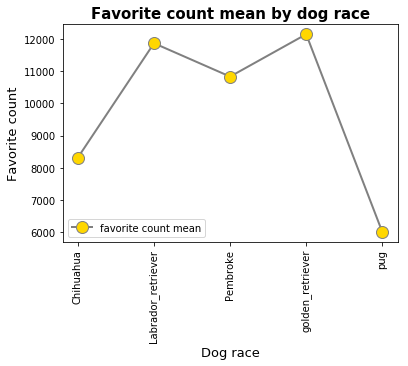

In [138]:
# Plotagem da média de quantidade de favoritos por raça de cachorro
plt.plot('prediction', 'favorite_count', data=df_top_5_predict_mean, marker='o', markerfacecolor='gold', markersize=12, 
         color='gray', linewidth=2, label="favorite count mean")

# Título do gráfico
plt.title("Favorite count mean by dog race", size=15, fontweight='bold')

# Rotaciona os rótulos do eixo X
plt.xticks(rotation=90)

# Rótulos
plt.xlabel("Dog race", size=13)
plt.ylabel("Favorite count", size=13)
plt.legend();

# Mostrar
plt.show()

*Média da quantidade de favoritos por raça de cachorro. O mais amado é o Golden Retriever, seguido pelo Labrador Retriever, Pembroke, Chihuahua e Pug.*

### Classificação por média de *retweet_count*?

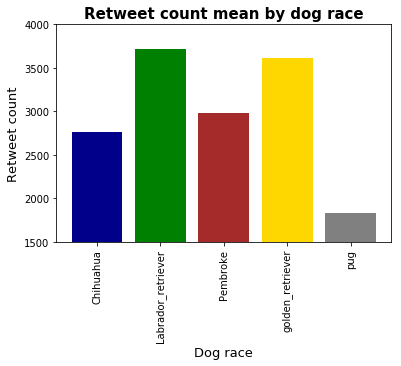

In [139]:
# Dados padrões para criar o gráfico
height = df_top_5_predict_mean.retweet_count
bars = df_top_5_predict_mean.prediction
y_pos = np.arange(len(bars))
colors = ['darkblue', 'green', 'brown', 'gold', 'gray']

# Cria as barras e escolhe a cor
plt.bar(y_pos, height, color=colors)
 
# Adiciona título ao gráfico e nomes aos eixos
plt.title('Retweet count mean by dog race', size=15, fontweight='bold')
plt.xlabel("Dog race", size=13)
plt.ylabel("Retweet count", size=13)
 
# Limitações para o eixo Y
plt.ylim(1500,4000)
 
# Cria os nomes das raças
plt.xticks(y_pos, bars, rotation=90)
 
# Mostrar
plt.show()

*Quantidade média de retweet por raça de cachorro. O Labrador Retriever fica um pouco a frente do mais amado (baseado na contagem de favoritos), Golden Retriever. Estes dois sendo seguidos pelo Pembroke, Chihuahua e Pug.*

### Classificação por média de *rating_total*?

In [140]:
# Cria os nomes
names=df_top_5_predict_mean['prediction']
# Subtraindo 1 do valor total de classificação e multiplicando o resultado por 100.
# Desta forma deixo a diferença entre cada classificação melhor "visualizável" no gráfico.
size = (df_top_5_predict_mean['rating_total'] - 1) * 100
size

0    5.494505 
1    11.944444
2    14.105263
3    16.146497
4    2.419355 
Name: rating_total, dtype: float64

*Cada média que representa uma parte do gráfico de rosca. Isto fará as diferenças melhor visualizáveis.*

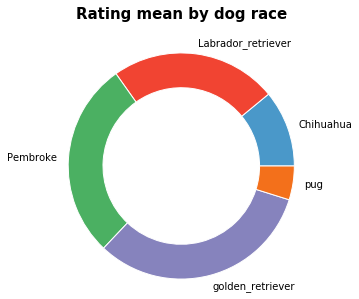

In [141]:
# Dados padrões para criação do gráfico
group_names=names
group_size=size
group_grad=0.6
 
# Cria as cores
b, r, g, p, o=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples, plt.cm.Oranges]
group_colors=[b(group_grad), r(group_grad), g(group_grad), p(group_grad), o(group_grad)]

# Criando o gráfico de rosca
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=group_colors)
plt.setp(mypie, width=0.4, edgecolor='white')

# Título
plt.title('Rating mean by dog race', size=15, fontweight='bold', y=1.15)

# Mostrar
plt.show()

*Média total de classificação por raça de cachorro. Golden Retriever ainda senta no topo, seguido pelo Pembroke, Labrador Retriever, Chihuahua e Pug.*

## Insights

Apesar do Golden Retriever ter a maior contagem de *tweets*, ele perdeu para o Labrador Retriever em média de *retweet_count*. Outra coisa interessante aconteceu com o *rating_total*, onde o Pembroke venceu contra o Labrador Retriever, que possui a segunda maior contagem de *tweet*.

Então, enumerando, é possível perceber:
1. Golden Retriever tem, de longe, a maior quantidade de *tweets* e a maior média de *favorite_count*;
2. Mesmo com tanta quantidade de *tweets*, o Golden Retriever perdeu para o Labrador Retriever em *retweet_count*;
3. Pembroke, que fica em terceiro em quantidade de *tweets*, *favorite_count* e *retweet_count*, teve a segunda maior média de *rating_total*, com uma grande vantagem sobre o Labrador Retriever.